# 🔴 Download and Read the Data

In [ ]:
# import the modules
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the train data
x_train = pd.read_csv('/content/drive/MyDrive/Deep Learning final Project/X_train_F24_withID.csv')
x_train.head()

,Unnamed: 0,id,0,1,2,3,4,5,6,7,8,9,10,11,12
0,626,a0522c83,200315.5,-0.505789,-0.069706,0.013336,0.025508,1.611984,0.03190,21.629858,3850.230225,4.330124e+13,4.012999,1.000000,18.649494
1,307,4a4a0f78,190155.5,0.121610,0.032871,0.152650,0.034276,10.249540,0.00000,22.919933,3814.928467,4.320668e+13,3.897484,1.000000,88.265633
2,662,a8b0428d,692.5,-0.275158,0.259596,0.317515,0.029915,20.623983,0.00000,25.377674,3887.100342,4.550378e+13,5.284993,3.605339,249.643585
3,394,6282e693,68514.0,-0.256388,-0.066792,-0.174034,0.086394,-12.297556,0.00000,87.192596,3991.940674,4.818751e+13,3.682242,4.000000,19.846697
4,644,a4530b41,203633.5,0.016842,-0.047838,0.140291,0.047017,8.838480,0.04807,17.082886,3839.499756,4.331332e+13,4.200448,2.318395,12.925396


In [ ]:
# read the test data
x_test = pd.read_csv('/content/drive/MyDrive/Deep Learning final Project/X_test_F24_withID.csv')
x_test.head()

,Unnamed: 0,id,0,1,2,3,4,5,6,7,8,9,10,11,12
0,832,d8037389,165125.5,0.143036,-0.181769,-0.181729,0.016326,-11.711159,0.527468,37.457684,3801.283203,4.320750e+13,3.997929,1.344065,20.519676
1,970,fa34f945,201455.5,0.006469,0.181113,0.016930,0.005865,0.282131,0.655512,6.660067,3840.426758,4.344929e+13,4.117763,1.957738,259.711731
2,96,15f2e240,103292.0,0.067980,0.048636,-0.043515,0.060266,-3.391100,0.000000,118.007446,3872.124023,5.190286e+13,3.828579,3.000000,121.229202
3,587,98ed2153,207209.5,-0.018163,0.005685,-0.128748,0.025637,-10.272767,0.229767,21.151602,3851.124512,4.318962e+13,4.146489,1.192529,348.126129
4,450,7187caec,204647.5,-0.013084,-0.121897,-0.086763,0.020461,-8.525217,0.429443,11.357171,3844.143311,4.339946e+13,4.147766,4.000000,33.821274


In [ ]:
# Concatenate x_train and x_test vertically (stack rows)
df = pd.concat([x_train, x_test], axis=0, ignore_index=True)

# Display the shape of the combined DataFrame
print("Shape of the combined DataFrame:", df.shape)

# Display the first few rows of the combined DataFrame
df.head()

Shape of the combined DataFrame: (996, 15)


,Unnamed: 0,id,0,1,2,3,4,5,6,7,8,9,10,11,12
0,626,a0522c83,200315.5,-0.505789,-0.069706,0.013336,0.025508,1.611984,0.03190,21.629858,3850.230225,4.330124e+13,4.012999,1.000000,18.649494
1,307,4a4a0f78,190155.5,0.121610,0.032871,0.152650,0.034276,10.249540,0.00000,22.919933,3814.928467,4.320668e+13,3.897484,1.000000,88.265633
2,662,a8b0428d,692.5,-0.275158,0.259596,0.317515,0.029915,20.623983,0.00000,25.377674,3887.100342,4.550378e+13,5.284993,3.605339,249.643585
3,394,6282e693,68514.0,-0.256388,-0.066792,-0.174034,0.086394,-12.297556,0.00000,87.192596,3991.940674,4.818751e+13,3.682242,4.000000,19.846697
4,644,a4530b41,203633.5,0.016842,-0.047838,0.140291,0.047017,8.838480,0.04807,17.082886,3839.499756,4.331332e+13,4.200448,2.318395,12.925396


In [ ]:
# read the demographic data
demo = pd.read_csv('/content/drive/MyDrive/Deep Learning final Project/train (1).csv')
demo.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

import os

def count_csv_files(directory):
  """Counts the number of .csv files in a given directory.

  Args:
    directory: The path to the directory to search.

  Returns:
    The number of .csv files in the directory.
  """
  count = 0
  for filename in os.listdir(directory):
    if filename.endswith(".csv"):
      count += 1
  return count

# Replace 'directory_path' with YOUR actual directory name
directory_path = '/content/drive/MyDrive/Deep Learning final Project/MinFC_results'
csv_count = count_csv_files(directory_path)
print(f"Number of .csv files in {directory_path}: {csv_count}")

Number of .csv files in /content/drive/MyDrive/Deep Learning final Project/MinFC_results: 996


In [ ]:
import os
import pandas as pd

def join_csv_files_with_id(directory):
  """Joins all CSV files in a directory into a single DataFrame, adding an ID column.

  Args:
    directory: The path to the directory containing CSV files.

  Returns:
    A Pandas DataFrame containing the joined data.
  """
  all_dfs = []
  for filename in os.listdir(directory):
    if filename.endswith(".csv"):
      file_id = filename[3:-4]  # Remove the ".csv" extension
      filepath = os.path.join(directory, filename)
      try:
        # Attempt to read the CSV file
        df = pd.read_csv(filepath)

        # Check if the DataFrame is empty after reading
        if df.empty:
          print(f"Warning: {filename} is empty and will be skipped.")
          continue  # Skip to the next file

        df['id'] = file_id
        all_dfs.append(df)
      except pd.errors.EmptyDataError:
        print(f"Warning: {filename} is empty or has no columns and will be skipped.")
      except pd.errors.ParserError:
        print(f"Warning: {filename} could not be parsed as a CSV and will be skipped.")
      except Exception as e:
        print(f"Warning: An error occurred while reading {filename}: {e}")

  if all_dfs:
    return pd.concat(all_dfs, ignore_index=True)
  else:
    return pd.DataFrame()

# Replace 'your_directory' with the actual directory path
directory_path = '/content/drive/MyDrive/Deep Learning final Project/MinFC_results'
combined_min_df = join_csv_files_with_id(directory_path)

# Get a list of columns
cols = combined_min_df.columns.tolist()

# Move 'id' to the first position
cols = ['id'] + [col for col in cols if col != 'id']

# Reorder the DataFrame
combined_min_df = combined_min_df[cols]

# Save the combined DataFrame to a new CSV file (optional)
combined_min_df.to_csv('/content/drive/MyDrive/Deep Learning final Project/combined_MiniFC_results.csv', index=False)
print(combined_min_df.shape)
print("Combined CSV files and saved to .csv")

(996, 141)
Combined CSV files and saved to .csv


In [ ]:
print(combined_min_df.shape)
combined_min_df.head()

(996, 141)


,id,X__absolute_maximum,X__length,X__maximum,X__mean,X__median,X__minimum,X__root_mean_square,X__standard_deviation,X__sum_values,...,weekday__absolute_maximum,weekday__length,weekday__maximum,weekday__mean,weekday__median,weekday__minimum,weekday__root_mean_square,weekday__standard_deviation,weekday__sum_values,weekday__variance
0,eeedcd5e,1.094815,252038.0,1.052496,-0.529011,-0.646135,-1.094815,0.672609,0.415392,-133330.919959,...,7.0,252038.0,7.0,4.150727,4.0,1.0,4.573248,1.919911,1046141.0,3.686059
1,f09e7b33,1.852143,419724.0,1.034695,-0.193518,-0.029986,-1.852143,0.459151,0.416378,-81224.330847,...,7.0,419724.0,7.0,3.947337,4.0,1.0,4.381303,1.901143,1656792.0,3.614346
2,75ad73ee,1.833609,362176.0,1.301800,-0.143584,-0.048754,-1.833609,0.501527,0.480534,-52002.726685,...,7.0,362176.0,7.0,4.003888,4.0,1.0,4.475612,1.999996,1450112.0,3.999985
3,8148c785,1.056764,415596.0,0.975363,0.087735,0.128938,-1.056764,0.285243,0.271415,36462.394546,...,7.0,415596.0,7.0,4.121416,4.0,1.0,4.616112,2.079044,1712844.0,4.322422
4,4b3c7594,2.881159,376140.0,1.011818,-0.373491,-0.488638,-2.881159,0.615920,0.489758,-140484.802175,...,7.0,376140.0,7.0,4.024438,4.0,1.0,4.480952,1.970490,1513752.0,3.882829


In [ ]:
merged_df = pd.merge(df, demo, on='id', how='inner')

# 🔴 EDA

## 🔷 Plot - 1 : Target Distribution

<ipython-input-75-93a61a138ab8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sii', data=merged_df, palette='viridis')


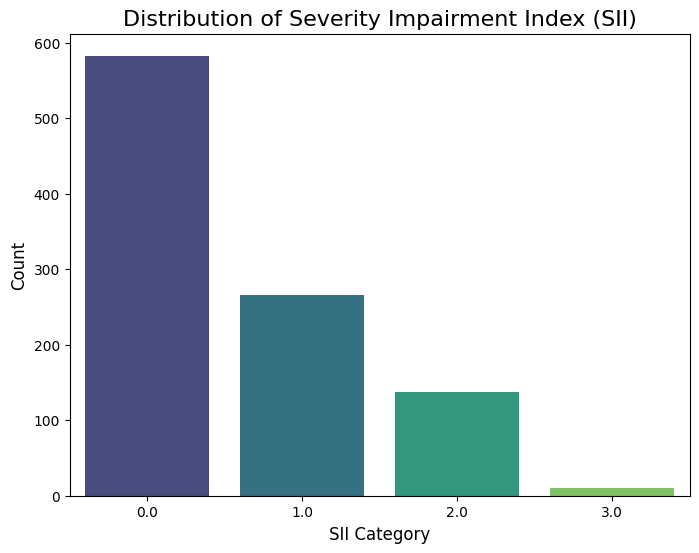

In [ ]:
# 1. Target Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sii', data=merged_df, palette='viridis')
plt.title('Distribution of Severity Impairment Index (SII)', fontsize=16)
plt.xlabel('SII Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Observation:**
* The `SII` categories (0, 1, 2, and 3) are imbalanced.
* Lower severity levels (0 and 1) are more frequent, while higher severity levels (2 and 3) are less common.

**Interpretation:**
* This imbalance indicates that most participants in the dataset show mild or no problematic internet usage behaviors.
*Class imbalance might bias the model to favor predicting the more frequent classes (0 and 1) while underperforming on the higher severity levels (2 and 3).

## 🔷 Plot - 2 : Age vs. SII

<ipython-input-77-98c51df79dfc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sii', y='Basic_Demos-Age', data=merged_df, palette='muted')


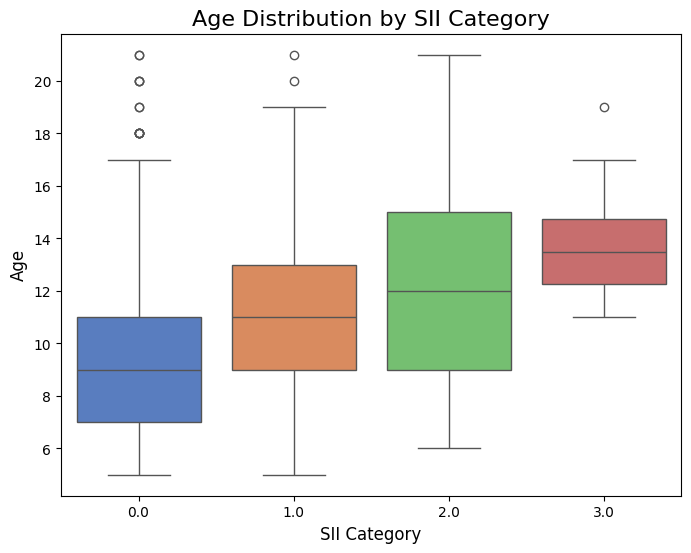

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='sii', y='Basic_Demos-Age', data=merged_df, palette='muted')
plt.title('Age Distribution by SII Category', fontsize=16)
plt.xlabel('SII Category', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

**Trend in Age:** Higher SII categories (2 and 3) are associated with younger participants, suggesting that younger individuals may exhibit more severe internet-related impairment.

**Variance**: Categories 0 and 1 show broader variability in age, while SII=3 is more concentrated around early adolescence.

**Outliers:** There are outliers in all categories, particularly in SII=0 and SII=1, where older participants occasionally fall into less severe impairment.

This pattern implies a potential age-based vulnerability to problematic internet behaviors, warranting further analysis of interaction effects between age, internet use, and related behaviors.

## 🔷 Plot - 3 : Gender-Based Analysis (Demographics and SII)

<ipython-input-84-956de53eceaf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Basic_Demos-Sex', y='sii', data=merged_df, palette='pastel')


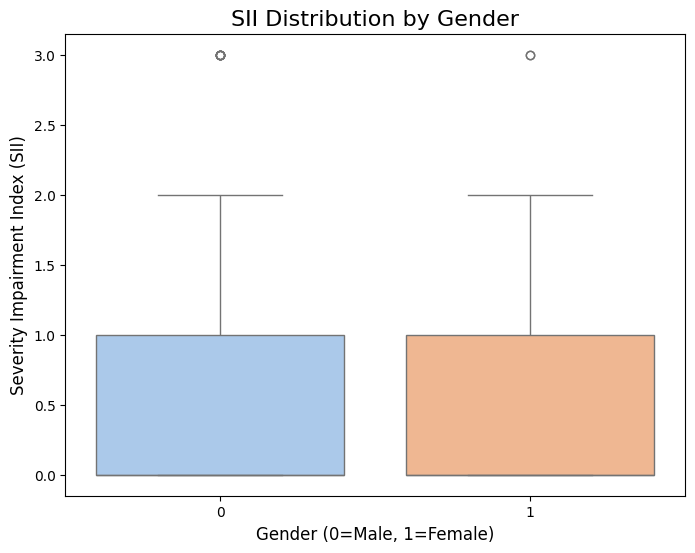

In [ ]:
# Gender-Based Analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Basic_Demos-Sex', y='sii', data=merged_df, palette='pastel')
plt.title('SII Distribution by Gender', fontsize=16)
plt.xlabel('Gender (0=Male, 1=Female)', fontsize=12)
plt.ylabel('Severity Impairment Index (SII)', fontsize=12)
plt.show()


The boxplot shows no significant differences in `SII` distribution between genders, with similar medians and variability. Both genders have outliers at `SII=3`, suggesting extreme cases occur in both groups. Gender does not appear to strongly influence `SII`, prompting further exploration of other factors like internet usage or sleep disturbance.

## 🔷 Plot - 4 : Internet usage vs. SII

<ipython-input-85-f3c61835c2dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sii', y='PreInt_EduHx-computerinternet_hoursday', data=merged_df, palette='muted')


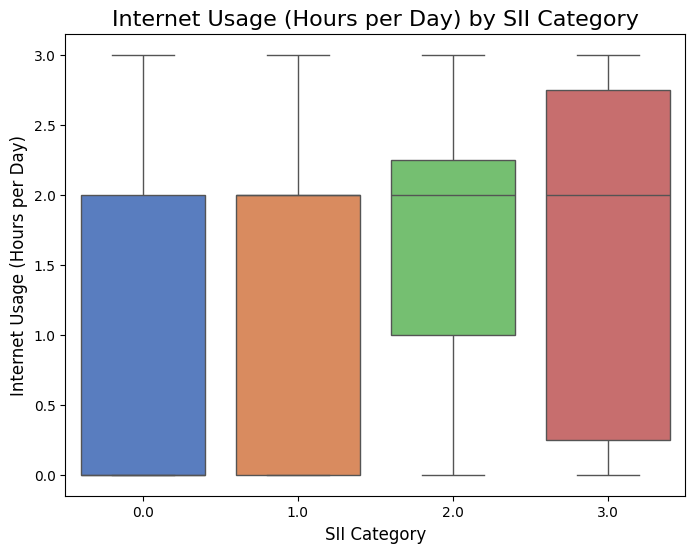

In [ ]:
# Internet Usage vs. SII
plt.figure(figsize=(8, 6))
sns.boxplot(x='sii', y='PreInt_EduHx-computerinternet_hoursday', data=merged_df, palette='muted')
plt.title('Internet Usage (Hours per Day) by SII Category', fontsize=16)
plt.xlabel('SII Category', fontsize=12)
plt.ylabel('Internet Usage (Hours per Day)', fontsize=12)
plt.show()


The boxplot shows that higher `SII` categories are associated with slightly increased median internet usage hours. Participants with `SII=3` exhibit the highest median internet usage, suggesting a link between more severe internet-related impairment and greater daily internet use.

## 🔷 Plot - 5 : Scatterplot of Total Body Water (BIA-BIA_TBW) by SII with Age as Hue

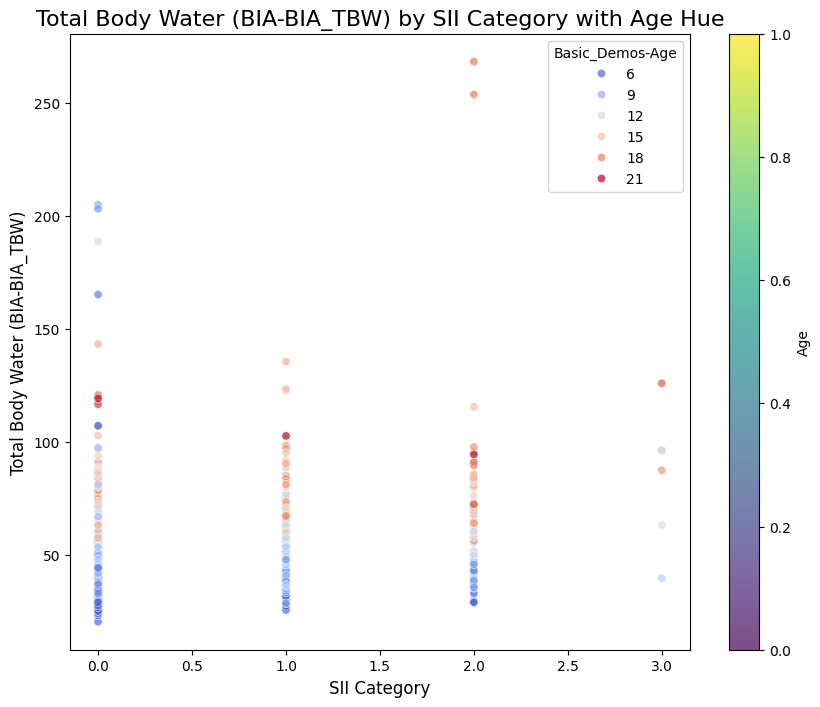

In [ ]:
plt.figure(figsize=(10, 8))

# Assign the scatterplot to a variable
scatter = sns.scatterplot(
    x='sii',
    y='BIA-BIA_TBW',
    hue='Basic_Demos-Age',
    data=merged_df,
    palette='coolwarm',
    alpha=0.7  # Remove the extra 'a'
)

plt.title('Total Body Water (BIA-BIA_TBW) by SII Category with Age Hue', fontsize=16)
plt.xlabel('SII Category', fontsize=12)
plt.ylabel('Total Body Water (BIA-BIA_TBW)', fontsize=12)

# Explicitly link the colorbar to the scatterplot
plt.colorbar(scatter.collections[0], label='Age')

plt.show()

This scatterplot visualizes `Total Body Water (BIA-BIA_TBW)` across `SII` categories, with participant age represented as a color gradient:

1. **Age Patterns**:
   - Younger participants (lighter shades, e.g., ages 6-12) dominate lower `SII` categories (`0` and `1`).
   - Older participants (darker shades, e.g., ages 18-21) are scattered across all `SII` categories, including higher levels (`2` and `3`).

2. **Total Body Water Trends**:
   - Most participants across all `SII` categories have `Total Body Water` below 100.
   - Higher values (>150) appear as outliers, particularly in `SII=0`, indicating some variability within lower severity categories.

3. **Insights**:
   - There is no clear age-related trend in total body water within higher `SII` categories (`2` and `3`), but younger participants tend to cluster in lower severity groups.
   - This suggests that `Total Body Water` alone may not be a strong predictor of `SII`, although age might still interact with other factors to influence severity.

The graph highlights the need to explore additional variables or interactions to better understand age and physical health's role in problematic internet usage severity.

## 🔷 Table - 1 : Breakdown of Missing Data

In [ ]:
# Calculate missing data summary
missing_data = merged_df.isnull().sum().reset_index()
missing_data.columns = ['Feature', 'Missing Count']
missing_data['Missing Percentage'] = (missing_data['Missing Count'] / len(merged_df)) * 100

# Sort by missing percentage in descending order
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

# Display the missing data summary using pandas head()
print("Missing Data Summary:")
print(missing_data.head()) # Displaying the first few rows of the dataframe


Missing Data Summary:
                         Feature  Missing Count  Missing Percentage
24  Physical-Waist_Circumference            949           95.281124
65             PAQ_A-PAQ_A_Total            859           86.244980
64                  PAQ_A-Season            859           86.244980
31    Fitness_Endurance-Time_Sec            698           70.080321
30   Fitness_Endurance-Time_Mins            698           70.080321


## 🔷 Table - 2 : Summary of Statistics Table for Key Features

In [ ]:
# Select key features for summary statistics
key_features = ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday',
                'SDS-SDS_Total_T', 'BIA-BIA_TBW', 'sii']

# Generate summary statistics
summary_stats = merged_df[key_features].describe().transpose()

# Rename columns for clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean', '50%': 'Median', 'std': 'Std Dev',
    'min': 'Min', 'max': 'Max', 'count': 'Non-Missing Count'
})

# Display the summary statistics table
print("Summary Statistics of Key Features:")
summary_stats = pd.DataFrame(summary_stats)
summary_stats

Summary Statistics of Key Features:


,Non-Missing Count,Mean,Std Dev,Min,25%,Median,75%,Max
Basic_Demos-Age,996.0,10.308233,3.462414,5.0000,8.0000,10.0000,12.0000,21.000
PreInt_EduHx-computerinternet_hoursday,985.0,1.018274,1.092133,0.0000,0.0000,1.0000,2.0000,3.000
SDS-SDS_Total_T,896.0,57.493304,13.206227,38.0000,47.0000,55.0000,64.0000,100.000
BIA-BIA_TBW,737.0,51.735112,24.578977,20.5892,35.8871,45.7755,60.7819,268.022
sii,996.0,0.572289,0.762036,0.0000,0.0000,0.0000,1.0000,3.000


- **Age**: Mean = 10.3 years (range: 5-21); most participants are 8-12 years.
- **Internet Usage**: Mean = 1 hour/day (range: 0-3); minimal missing data.
- **Sleep Disturbance**: Mean = 57.5 (range: 38-100); some missing data (896 entries).
- **Total Body Water**: Mean = 51.7 (range: 20.6-268); significant missing data (737 entries).
- **Severity Index (SII)**: Mean = 0.57 (range: 0-3); most participants in lower severity categories.


## 🔷 Table - 3 : Correlation Matrix with Top Predictors

In [ ]:
# Select key features and compute correlation matrix
correlation_features = ['sii', 'Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday',
                        'SDS-SDS_Total_T', 'BIA-BIA_TBW']
correlation_matrix = merged_df[correlation_features].corr()

# Display the correlation matrix
print("Correlation Matrix of Key Predictors:")
correlation_matrix = pd.DataFrame(correlation_matrix)
correlation_matrix

Correlation Matrix of Key Predictors:


,sii,Basic_Demos-Age,PreInt_EduHx-computerinternet_hoursday,SDS-SDS_Total_T,BIA-BIA_TBW
sii,1.000000,0.351316,0.341086,0.182497,0.280976
Basic_Demos-Age,0.351316,1.000000,0.424314,0.010063,0.679607
PreInt_EduHx-computerinternet_hoursday,0.341086,0.424314,1.000000,0.024287,0.332166
SDS-SDS_Total_T,0.182497,0.010063,0.024287,1.000000,0.016978
BIA-BIA_TBW,0.280976,0.679607,0.332166,0.016978,1.000000


**Correlation with SII:**
* Basic_Demos-Age (0.35): Moderate positive correlation suggests older participants are more likely to have higher SII scores, indicating age might influence severity.
* PreInt_EduHx-computerinternet_hoursday (0.34): Internet usage has a moderate positive correlation with SII, supporting the hypothesis that higher internet use is associated with greater severity.
* BIA-BIA_TBW (0.28): Total body water shows a weaker positive correlation with SII, suggesting physical health metrics might have some influence.

**Inter-feature Relationships:**
* Basic_Demos-Age and BIA-BIA_TBW (0.68): Strong correlation indicates older participants tend to have higher total body water.
* Basic_Demos-Age and PreInt_EduHx-computerinternet_hoursday (0.42): Moderate correlation shows older participants tend to spend more time online, which may indirectly affect SII.
* SDS-SDS_Total_T has weak correlations with all variables, suggesting sleep disturbance might be less influential in predicting SII.

**Insights:**
* Internet usage and age are the most significant predictors of SII, making them priority features for modeling.
* Physical health features like BIA-BIA_TBW may contribute indirectly but should be explored further for interaction effects.
* Weak correlations for sleep disturbance suggest its role in SII is limited in this dataset, though non-linear patterns may still exist.

## 🔷 Table - 4 : Comparison of Internet Usage and Sleep Disturbance Across SII Categories

In [ ]:
# Group by SII and calculate mean and std for internet usage and sleep disturbance
behavior_metrics = merged_df.groupby('sii')[['PreInt_EduHx-computerinternet_hoursday', 'SDS-SDS_Total_T']].agg(['mean', 'std'])

# Rename columns for clarity
behavior_metrics.columns = ['Internet Usage Mean', 'Internet Usage Std', 'Sleep Disturbance Mean', 'Sleep Disturbance Std']
behavior_metrics.reset_index(inplace=True)

# Display the table
print("Behavior Metrics by SII Category:")
behavior_metrics = pd.DataFrame(behavior_metrics)
behavior_metrics

Behavior Metrics by SII Category:


,sii,Internet Usage Mean,Internet Usage Std,Sleep Disturbance Mean,Sleep Disturbance Std
0,0.0,0.711304,0.982492,55.651515,12.841899
1,1.0,1.318182,1.077373,59.139918,13.041771
2,2.0,1.691176,1.078509,61.769231,13.843575
3,3.0,1.600000,1.264911,66.500000,8.880154


## 🔷 Table -5 : Clustering Results Summary

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select features for clustering
clustering_features = ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday', 'BIA-BIA_TBW']

# Create a subset of the data without missing values for clustering
data_for_clustering = merged_df[clustering_features].dropna()

# Scale the features
scaled_features = StandardScaler().fit_transform(data_for_clustering)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(scaled_features)

# Assign cluster labels to the subset of data used for clustering
data_for_clustering['Cluster'] = kmeans.labels_

# Reset index of both DataFrames before merging to avoid potential index mismatches
data_for_clustering.reset_index(inplace=True)
merged_df.reset_index(inplace=True)


# Merge the cluster labels back into the original dataframe using a common column
# like 'index' which should have been created by reset_index()
merged_df = pd.merge(merged_df, data_for_clustering[['index', 'Cluster']], on='index', how='left')

# Set index back to the original
merged_df.set_index('index', inplace=True)


# Summarize cluster characteristics
cluster_summary = merged_df.groupby('Cluster')[clustering_features].mean()
cluster_summary['Cluster Size'] = merged_df['Cluster'].value_counts()

# Display the clustering results summary
print("Clustering Results Summary:")
cluster_summary = pd.DataFrame(cluster_summary)
cluster_summary

Clustering Results Summary:


,Basic_Demos-Age,PreInt_EduHx-computerinternet_hoursday,BIA-BIA_TBW,Cluster Size
Cluster,,,,
0.0,8.224719,0.112360,40.086243,356
1.0,9.843902,2.043902,45.969261,205
2.0,15.201183,1.745562,82.966648,169


**Cluster 0:**
Average Age: 8.2 years.
Average Internet Usage: 0.11 hours/day (minimal usage).
Average Total Body Water: 40.08.
Cluster Size: 356 participants.
Insights: This group represents the youngest participants with the lowest internet usage and body water levels, likely indicating minimal internet-related issues.

**Cluster 1:**
Average Age: 9.8 years.
Average Internet Usage: 2.04 hours/day (moderate usage).
Average Total Body Water: 45.97.
Cluster Size: 205 participants.
Insights: Slightly older participants with moderate internet usage and body water levels, possibly indicating participants at risk for problematic internet behavior.

**Cluster 2:**
Average Age: 15.2 years.
Average Internet Usage: 1.75 hours/day (moderate usage).
Average Total Body Water: 82.97.
Cluster Size: 169 participants.
Insights: This group represents the oldest participants with higher body water levels and moderate internet usage. This group might indicate participants with a higher physical maturity level, but their internet usage is similar to Cluster 1.

In [ ]:
# data merging with MinFC
merged_df = pd.merge(merged_df, combined_min_df, on='id', how='inner')

In [ ]:
merged_df.head()

,Unnamed: 0,id,0,1,2,3,4,5,6,7,...,weekday__absolute_maximum,weekday__length,weekday__maximum,weekday__mean,weekday__median,weekday__minimum,weekday__root_mean_square,weekday__standard_deviation,weekday__sum_values,weekday__variance
0,626,a0522c83,200315.5,-0.505789,-0.069706,0.013336,0.025508,1.611984,0.03190,21.629858,...,7.0,400632.0,7.0,4.012999,4.0,1.0,4.447266,1.916770,1607736.0,3.674006
1,307,4a4a0f78,190155.5,0.121610,0.032871,0.152650,0.034276,10.249540,0.00000,22.919933,...,7.0,380312.0,7.0,3.897484,4.0,1.0,4.385669,2.010898,1482260.0,4.043709
2,662,a8b0428d,692.5,-0.275158,0.259596,0.317515,0.029915,20.623983,0.00000,25.377674,...,7.0,1386.0,7.0,5.284993,5.0,1.0,5.341512,0.774982,7325.0,0.600597
3,394,6282e693,68514.0,-0.256388,-0.066792,-0.174034,0.086394,-12.297556,0.00000,87.192596,...,7.0,137029.0,7.0,3.682242,4.0,1.0,4.055526,1.699524,504574.0,2.888383
4,644,a4530b41,203633.5,0.016842,-0.047838,0.140291,0.047017,8.838480,0.04807,17.082886,...,7.0,407268.0,7.0,4.200448,4.0,1.0,4.670652,2.042359,1710708.0,4.171229


In [ ]:
merged_df.drop(columns=['sii'], inplace=True)

# 🔴 Data Preprocessing

## 🔷 Data Cleaning

In [ ]:
# checking the missing values
merged_df.isna().sum()

,0
Unnamed: 0,0
id,0
0,0
1,0
2,0
...,...
weekday__minimum,0
weekday__root_mean_square,0
weekday__standard_deviation,0
weekday__sum_values,0


In [ ]:
import pandas as pd


missing_data = merged_df.isnull().mean() * 100  # Calculate percentage of missing values
columns_with_missing = missing_data[missing_data >= 40]  # Filter columns with >= 40% missing data

# Display the columns and their percentage of missing data
print("Columns with at least 40% missing data:")
print(columns_with_missing)


Columns with at least 40% missing data:
Physical-Waist_Circumference    95.281124
Fitness_Endurance-Season        46.686747
Fitness_Endurance-Max_Stage     69.979920
Fitness_Endurance-Time_Mins     70.080321
Fitness_Endurance-Time_Sec      70.080321
FGC-FGC_GSND                    68.373494
FGC-FGC_GSND_Zone               68.674699
FGC-FGC_GSD                     68.373494
FGC-FGC_GSD_Zone                68.674699
PAQ_A-Season                    86.244980
PAQ_A-PAQ_A_Total               86.244980
PAQ_C-Season                    46.084337
PAQ_C-PAQ_C_Total               46.084337
dtype: float64


In [ ]:
# Calculate percentage of missing data
missing_data = merged_df.isnull().mean() * 100

# Identify columns with ≥40% missing data
columns_to_drop = missing_data[missing_data >= 40].index

# Drop these columns from the DataFrame
cleaned_df = merged_df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(cleaned_df.head())


Cleaned DataFrame:
   Unnamed: 0        id         0         1         2         3         4  \
0         626  a0522c83  200315.5 -0.505789 -0.069706  0.013336  0.025508   
1         307  4a4a0f78  190155.5  0.121610  0.032871  0.152650  0.034276   
2         662  a8b0428d     692.5 -0.275158  0.259596  0.317515  0.029915   
3         394  6282e693   68514.0 -0.256388 -0.066792 -0.174034  0.086394   
4         644  a4530b41  203633.5  0.016842 -0.047838  0.140291  0.047017   

           5        6          7  ...  weekday__absolute_maximum  \
0   1.611984  0.03190  21.629858  ...                        7.0   
1  10.249540  0.00000  22.919933  ...                        7.0   
2  20.623983  0.00000  25.377674  ...                        7.0   
3 -12.297556  0.00000  87.192596  ...                        7.0   
4   8.838480  0.04807  17.082886  ...                        7.0   

   weekday__length  weekday__maximum  weekday__mean  weekday__median  \
0         400632.0               7.0 

In [ ]:
df = cleaned_df

In [ ]:
# total sum of missing values
df.isna().sum().sum()

8260

## 🔷 Imputating the missing values

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

# Step 1: Select only numerical columns (float and int types) for KNN Imputation
# Explanation: KNNImputer works only on numerical data, so we exclude categorical columns
float_and_int_cols = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Initialize the KNN Imputer
# Explanation: KNNImputer uses the k-nearest neighbors to impute missing values based on the values of similar rows
knn_imputer = KNNImputer(n_neighbors=5)  # Use 5 nearest neighbors by default

# Step 3: Apply the KNN Imputer to the selected numerical columns
# Explanation: This imputes missing values in the float and int columns using the KNN algorithm
imputed_data = knn_imputer.fit_transform(float_and_int_cols)

# Step 4: Convert the imputed data back to a DataFrame
# Explanation: Since the KNN Imputer returns a NumPy array, we need to convert it back to a DataFrame
# We use the original column names for consistency
imputed_df = pd.DataFrame(imputed_data, columns=float_and_int_cols.columns)

# Step 5: Replace the original float and int columns in the DataFrame with the imputed values
# Explanation: Replace the columns in the original DataFrame to update it with the imputed values
df[float_and_int_cols.columns] = imputed_df

# Step 6: Print completion message
# Explanation: Indicate that the imputation process is finished
print("Imputation complete.")


Imputation complete.


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import pandas as pd

# Step 1: Identify categorical columns
# Explanation: Select all columns with data type 'object' as these are categorical columns.
categorical_columns = df.select_dtypes(include='object').columns

# Step 2: Replace string 'nan' and '<NA>' with actual NaN in categorical columns
# Explanation: Standardize missing values by converting string 'nan' and '<NA>' into proper NaN (pd.NA).
df[categorical_columns] = df[categorical_columns].replace(['nan', '<NA>'], pd.NA)

# Step 3: Encode categorical columns into numeric values
# Explanation: KNN Imputer requires numerical data, so we use LabelEncoder to convert each unique category
# in the categorical columns into a numerical value. This process is reversible (decoded back later).
label_encoders = {}  # Dictionary to store label encoders for each column
for col in categorical_columns:
    le = LabelEncoder()  # Create a new LabelEncoder instance for each column
    df[col] = le.fit_transform(df[col].astype(str))  # Convert categories to integers (including NaN as 'unknown')
    label_encoders[col] = le  # Save the encoder for later decoding

# Step 4: Initialize KNN Imputer
# Explanation: KNN Imputer replaces missing values based on the values of k-nearest neighbors (default: k=5).
knn_imputer = KNNImputer(n_neighbors=5)

# Step 5: Apply KNN Imputer to the DataFrame
# Explanation: Impute missing values for the encoded numerical representation of the categorical columns.
# The KNN algorithm uses the distance metric to calculate the nearest neighbors and imputes the missing value
# based on the majority/mode of its neighbors.
imputed_data = knn_imputer.fit_transform(df[categorical_columns])

# Step 6: Convert the imputed data back to a DataFrame
# Explanation: KNN Imputer returns a NumPy array, so we need to convert it back to a Pandas DataFrame
# with the same column names for consistency.
imputed_df = pd.DataFrame(imputed_data, columns=categorical_columns)

# Step 7: Decode numeric values back to original categories
# Explanation: Reverse the encoding to restore the original categorical values.
# Use the label encoders saved earlier to decode the integer values back to their original string categories.
for col in categorical_columns:
    imputed_df[col] = label_encoders[col].inverse_transform(imputed_df[col].round().astype(int))

# Replace the original columns in the DataFrame with the imputed categorical values
# Explanation: Update the original DataFrame with the now-imputed categorical columns.
df[categorical_columns] = imputed_df

# Step 8: Display the result
# Explanation: Print a message indicating the process is complete and optionally display the updated DataFrame.
print("Categorical values (including '<NA>' and 'nan') imputed successfully!")
print(df[categorical_columns].head())

Categorical values (including '<NA>' and 'nan') imputed successfully!
         id Basic_Demos-Enroll_Season CGAS-Season Physical-Season FGC-Season  \
0  a0522c83                      Fall      Spring            Fall       Fall   
1  4a4a0f78                      Fall      Spring          Winter     Winter   
2  a8b0428d                      Fall      Winter            Fall       Fall   
3  6282e693                    Summer      Winter          Summer     Summer   
4  a4530b41                      Fall      Winter          Winter     Winter   

  BIA-Season PCIAT-Season SDS-Season PreInt_EduHx-Season  
0       Fall       Winter     Winter                Fall  
1     Winter         Fall       Fall              Winter  
2       Fall       Winter     Winter                Fall  
3     Summer         Fall        nan              Summer  
4     Winter       Winter     Winter                Fall  


In [ ]:
columns_to_drop = [col for col in df.columns if "PCIAT" in col]
df = df.drop(columns=columns_to_drop)

# Display the updated column names to confirm removal
print("Updated columns after removing PCIAT-related columns:")
print(df.columns)

Updated columns after removing PCIAT-related columns:
Index(['Unnamed: 0', 'id', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       'weekday__absolute_maximum', 'weekday__length', 'weekday__maximum',
       'weekday__mean', 'weekday__median', 'weekday__minimum',
       'weekday__root_mean_square', 'weekday__standard_deviation',
       'weekday__sum_values', 'weekday__variance'],
      dtype='object', length=191)


In [ ]:
df.shape

(996, 191)

In [ ]:
# Automatically identify categorical columns, excluding the 'id' column
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Exclude specific columns, e.g., 'id'
columns_to_skip = ['id']  # Add other columns to skip if needed
categorical_columns = [col for col in categorical_columns if col not in columns_to_skip]

# Perform one-hot encoding for the identified categorical columns
categorical_dummies = pd.get_dummies(df[categorical_columns], drop_first=False).astype(int)  # Ensure 0/1 output

# Drop the identified categorical columns from the DataFrame
df = df.drop(categorical_columns, axis=1)

# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, categorical_dummies], axis=1)

# Display the updated DataFrame
print(df.head())

   Unnamed: 0        id         0         1         2         3         4  \
0       626.0  a0522c83  200315.5 -0.505789 -0.069706  0.013336  0.025508   
1       307.0  4a4a0f78  190155.5  0.121610  0.032871  0.152650  0.034276   
2       662.0  a8b0428d     692.5 -0.275158  0.259596  0.317515  0.029915   
3       394.0  6282e693   68514.0 -0.256388 -0.066792 -0.174034  0.086394   
4       644.0  a4530b41  203633.5  0.016842 -0.047838  0.140291  0.047017   

           5        6          7  ...  SDS-Season_Fall  SDS-Season_Spring  \
0   1.611984  0.03190  21.629858  ...                0                  0   
1  10.249540  0.00000  22.919933  ...                1                  0   
2  20.623983  0.00000  25.377674  ...                0                  0   
3 -12.297556  0.00000  87.192596  ...                0                  0   
4   8.838480  0.04807  17.082886  ...                0                  0   

   SDS-Season_Summer  SDS-Season_Winter  SDS-Season_nan  \
0              

In [ ]:
# drop the id and unnamed column
df = df.drop(columns=['id','Unnamed: 0'])

## 🔷 Split the Data into Train and Test

In [ ]:
# split the data to train and test
x_train = df[:796]
x_test = df[796:]

In [ ]:
# read the train and test target variables
y_train = pd.read_csv('/content/drive/MyDrive/Deep Learning final Project/F24_DS_DL_finalProject_data_withID/y_train_F24_withID.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Deep Learning final Project/F24_DS_DL_finalProject_data_withID/y_test_F24_withID.csv')

In [ ]:
# drop the id and Unnamed in target train and test data
y_train.drop(columns=['id','Unnamed: 0'], inplace=True)
y_test.drop(columns=['id','Unnamed: 0'], inplace=True)

In [ ]:
# remove the last row 797 from the y_test

y_train = y_train.drop(y_train.index[-1])

In [ ]:
# remove the last row 200 from the y_test

y_test = y_test.drop(y_test.index[-1])

In [ ]:
y_test.iloc[189]

,189
sii,0.0


In [ ]:
y_test.tail()

,sii
195,1.0
196,1.0
197,0.0
198,1.0
199,0.0


In [ ]:
# value counts
y_test['sii'].value_counts()

,count
sii,
0.0,120
1.0,80


In [ ]:
# Convert 'sii' column to integer
y_train['sii'] = pd.to_numeric(y_train['sii'], errors='coerce').astype(float).astype(int)
y_test['sii'] = pd.to_numeric(y_test['sii'], errors='coerce').astype(float).astype(int)
#covert the x_train,x_test, y_train, y_test in numpy array
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## 🔷 Data Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# 🔴 Modeling

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy

def focal_loss(gamma=2., alpha=0.25):
    bce = BinaryCrossentropy()
    def loss(y_true, y_pred):
        bce_loss = bce(y_true, y_pred)
        p_t = tf.where(tf.equal(y_true, 1), y_pred, 1-y_pred)
        fl = alpha * tf.pow(1-p_t, gamma) * bce_loss
        return fl
    return loss


## 🔷 Build, Compile and Train the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
import numpy as np
import tensorflow as tf
import random

# Set the seed for reproducibility
SEED = 1001
np.random.seed(SEED)         # Set seed for NumPy
tf.random.set_seed(SEED)     # Set seed for TensorFlow
random.seed(SEED)            # Set seed for Python's random module

# Clear any previous session
tf.keras.backend.clear_session()

# Reduce dimensionality using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=55)  # Reduce to 50 dimensions
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_pca.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model using focal loss
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=focal_loss(gamma=2.0, alpha=0.25),
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=1e-6)

# Train the model
history = model.fit(
    x_train_pca, y_train,
    validation_data=(x_test_pca, y_test),
    epochs=80,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(x_test_pca, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Generate predictions and calculate F1 Score
y_pred = (model.predict(x_test_pca) > 0.5).astype("int32")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5112 - loss: 0.2219 - val_accuracy: 0.6100 - val_loss: 0.1753 - learning_rate: 5.0000e-04
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4958 - loss: 0.2148 - val_accuracy: 0.6300 - val_loss: 0.1683 - learning_rate: 5.0000e-04
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5563 - loss: 0.1945 - val_accuracy: 0.6500 - val_loss: 0.1640 - learning_rate: 5.0000e-04
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5760 - loss: 0.1863 - val_accuracy: 0.6700 - val_loss: 0.1605 - learning_rate: 5.0000e-04
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5759 - loss: 0.1786 - val_accuracy: 0.6650 - val_loss: 0.1576 - learning_rate: 5.0000e-04
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6161 - loss: 0.1755 - val_accuracy: 0.6850 - val_loss: 0.1551 - learning_rate: 5.0000e-04
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6383 - loss

# 🔴 Model Results

## 🔷 Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Generate predictions
y_pred = (model.predict(x_test_pca) > 0.5).astype("int32")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["0", "1"]))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       120
           1       0.67      0.64      0.65        80

    accuracy                           0.73       200
   macro avg       0.72      0.71      0.72       200
weighted avg       0.73      0.73      0.73       200



In [ ]:
training_acc = history.history['accuracy'][-1]  # Last epoch training accuracy
print(f"Training Accuracy: {training_acc:.4f}")

Training Accuracy: 0.8367


## 🔷 Learning Curves

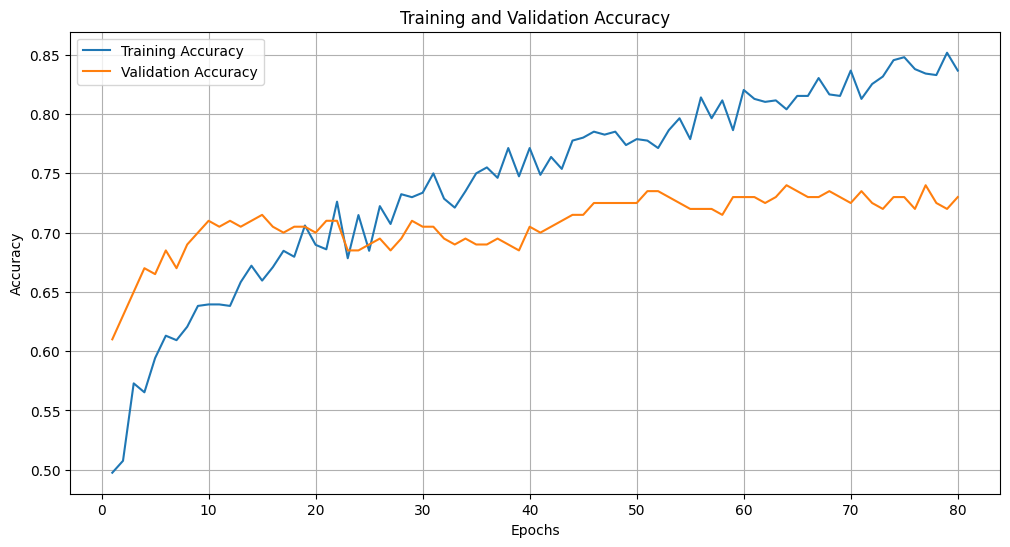

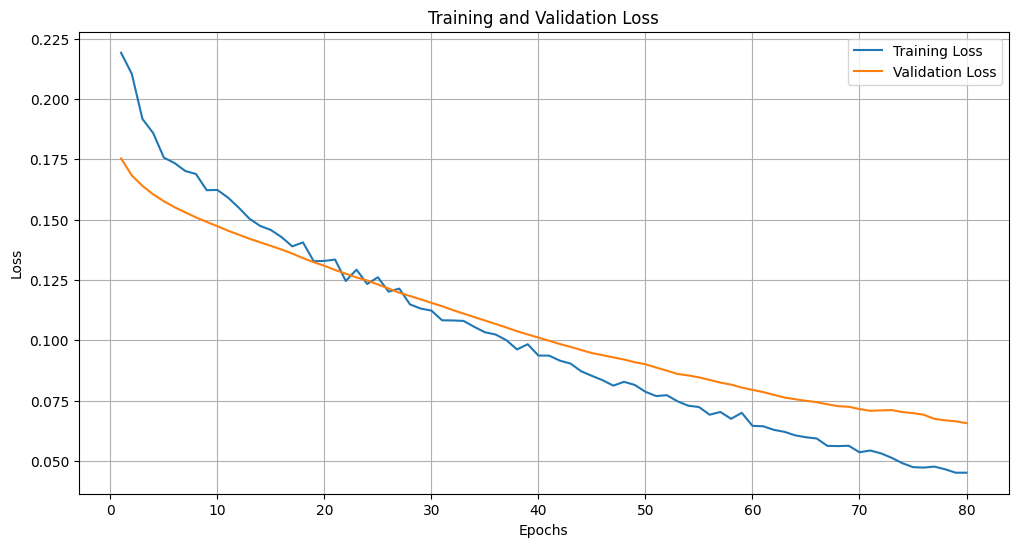

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_acc) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


## 🔷 ROC Curve

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


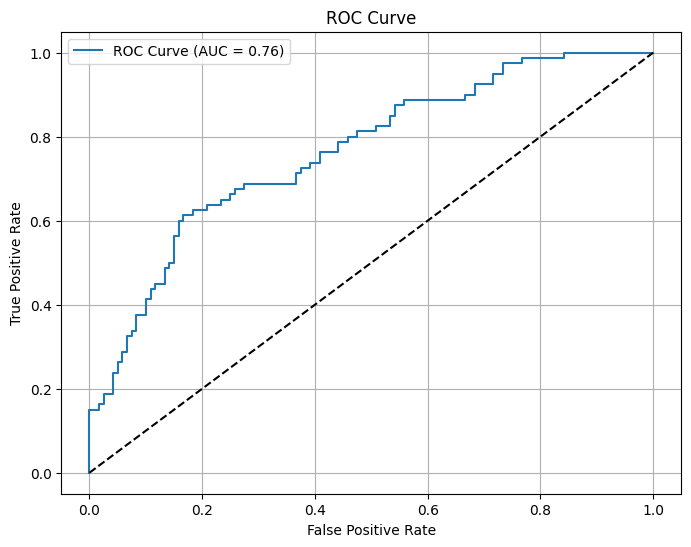

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(x_test_pca))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


# 🔴 Interpretability and Discussion


The model predicts problematic internet usage primarily based on significant features like internet usage hours, age, and total body water. These were identified during EDA as having moderate to strong correlations with the Severity Index (SII).


The model attempts to capture patterns between demographic data, behavioral metrics, and physical health to predict internet addiction severity. The model focused on important factors like age, internet usage hours, and sleep problems, which showed clear connections to internet addiction. Clustering helped in grouping participants based on these factors, making it easier to understand patterns and relationships in the data.

A balanced approach was used. Feature selection was guided by EDA, focusing on high-impact variables like internet usage hours, age, and sleep disturbance scores, while avoiding redundant features like those with low correlation (e.g., BMI, blood pressure). PCA helped reduce dimensionality, ensuring only the most relevant features were retained for the model.

## 🔷 Business Recommendations



**Primary Causes of Problematic Internet Usage:**
Excessive internet usage hours and poor sleep quality were strong contributors to higher severity levels. Interventions focusing on reducing screen time and improving sleep habits are recommended.

**Target High Screen-Time Users:**
Focus on reducing screen time for younger participants, especially those spending more than 1-2 hours daily online. Education campaigns and parental controls can help promote healthier internet habits.

**Need for Detailed Data:**
Demographic data alone (age, gender, internet usage) is sufficient for broad predictions, but including detailed time-series data on internet behavior could enhance accuracy for high-severity cases.

**Actionable Steps:**
Design educational programs targeting younger adolescents, particularly those exhibiting high internet usage. Address sleep disturbances as a secondary focus.


# 🔴 Conclusion

Based on above work I did, I've learned the following points by doing this project.


*   This project provided valuable hands-on experience in working with complex datasets, including tasks like cleaning, merging, and efficiently imputing missing data. I created different plots and tables to better understand the data and its patterns. I also learned how to work with parquet files and combine scattered data into one single DataFrame, making it easier to prepare the data and build models.
*   It also enhanced my understanding of neural networks and their application in solving real-world problems effectively.I deepened my knowledge on the architecture, including how to fine-tune layers, apply regularization techniques, and manage imbalanced datasets with focal loss. This process showed me how small adjustments can significantly impact model performance. My model achieved an F1 score of 0.73, indicating good predictive capability.

*   I discovered the importance of identifying and selecting relevant features through exploratory data analysis (EDA), which allowed me to focus on the most impactful variables while eliminating unnecessary complexity. By applying dimensionality reduction techniques like PCA, I enhanced model interpretability and performance by concentrating on features that contribute the most to predictions.

*   I learned how to evaluate model performance using metrics like accuracy, precision, recall, and F1 score. Additionally, visualizing results with ROC curves, learning curves, and training/validation accuracy and loss graphs gave me a clear understanding of how the model was learning and helped me in improving the F1 score.

*   This project taught me how to turn technical findings into business recommendations, like focusing on high-risk groups based on age and internet usage. It showed me the importance of using data insights to solve real-world problems effectively.



